In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Multicollinearity
#### When one feature is explained by all other features (more than 2)
#### When only 2 features are involved, it is called correlation
#### Multicollinearity can be observed using VIF and clustermap

<Axes: >

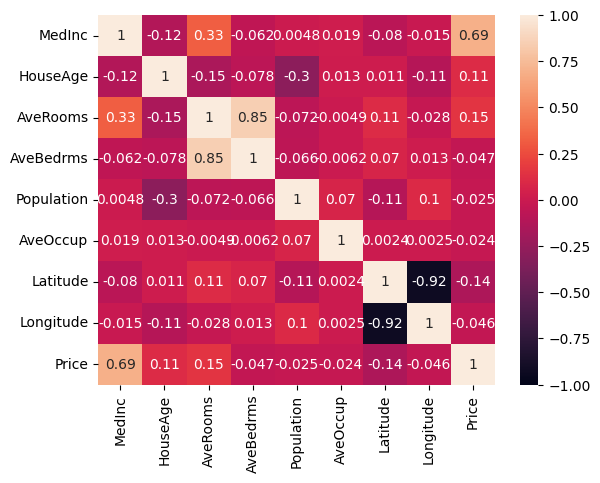

In [6]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

<Figure size 500x500 with 0 Axes>

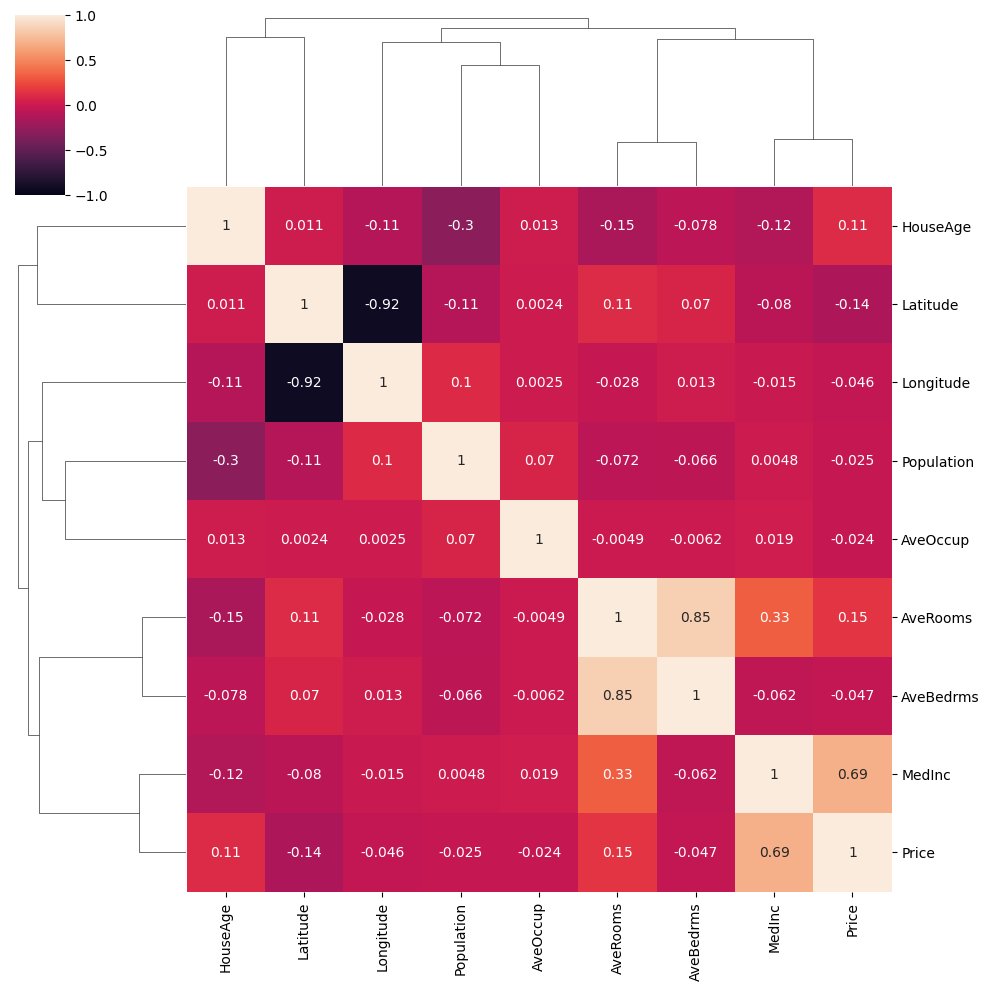

In [7]:
#Clustermap table shows group (cluster) relationship

plt.figure(figsize=(5,5))
sns.clustermap(df.corr(), vmin=-1, vmax=1, annot=True)

#### The diagram shows which feature or group of features are highly correlated to other feature or group of features.
#### Eg: AveRooms & AveBedrms are highly correlated to MedInc & Price

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
vif = pd.DataFrame()
vif["Feature"] = df.columns

#### The vif will have one feature vs all other features
#### Eg: MedInc vs all features from 1 to 8

In [10]:
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [11]:
vif

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [12]:
df1 = df.copy()

In [13]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [14]:
df1.drop('Longitude', axis = 1, inplace = True)

In [15]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [16]:
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [17]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [18]:
df1.drop('AveRooms', axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [19]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [20]:
df1.drop('Latitude', axis = 1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [21]:
vif

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [22]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [23]:
#Creating dependent and independent variables
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [24]:
X

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [25]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [28]:
X_train

,MedInc,HouseAge,AveBedrms,Population,AveOccup
5748,2.9148,15.0,1.105532,3164.0,2.692766
5592,3.1779,41.0,1.054825,1658.0,3.635965
2110,2.5111,49.0,0.964361,1290.0,2.704403
13901,2.5405,15.0,1.422326,2568.0,2.388837
18425,4.5033,7.0,1.101173,1739.0,2.549853
...,...,...,...,...,...
10955,1.7823,17.0,1.087156,1079.0,2.474771
17289,8.5608,42.0,1.011538,753.0,2.896154
5192,1.1326,42.0,1.006826,775.0,2.645051
12172,2.6322,10.0,0.951782,1323.0,2.773585


In [29]:
y_train

5748     2.38700
5592     1.71100
2110     0.55400
13901    0.69600
18425    2.13100
          ...   
10955    2.05300
17289    5.00001
5192     1.04800
12172    1.40700
235      1.26000
Name: Price, Length: 14448, dtype: float64

In [30]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
model

LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.coef_

array([ 0.8295202 ,  0.23888438,  0.02058888,  0.03902186, -0.05185743])

In [35]:
model.intercept_

2.0765314825581394

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([1.99486815, 1.39443153, 2.46691805, ..., 1.83891855, 1.28083607,
       1.20666527])

In [38]:
#Performance Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.6544937093127864
0.6046846522578225
0.8090078549141451


In [40]:
score = r2_score(y_test, y_pred)

In [41]:
score

0.5021661718778507

In [42]:
#Adjusted R2 score

1 - ((1-score) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1))

0.5017637843672444

### Implementation using Recursive Feature Elemination (RFE)

In [43]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [44]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [45]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [46]:
from sklearn.feature_selection import RFE

In [47]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [48]:
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 5)

In [49]:
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [50]:
rfe.predict(X)

array([3.98910415, 4.03191679, 3.44103761, ..., 0.22630645, 0.36574672,
       0.57907858])